In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)

(80, 1)
(80,)


In [12]:
from sklearn.datasets.california_housing import fetch_california_housing

data = fetch_california_housing()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(16512, 8)
(4128, 8)


In [44]:
#Check for correlation
corr_coef = []
feature_names = data.feature_names
for i in range(0,X.shape[1]):
    corr_coef.append(np.corrcoef([X[:,i],y])[0][1])
    
corr_list = list(zip(feature_names,np.round(corr_coef,2)))
corr_list

[('MedInc', 0.69),
 ('HouseAge', 0.11),
 ('AveRooms', 0.15),
 ('AveBedrms', -0.05),
 ('Population', -0.02),
 ('AveOccup', -0.02),
 ('Latitude', -0.14),
 ('Longitude', -0.05)]

In [64]:
# Feature selection using p-value

X_1 = sm.add_constant(X)

#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
p_values = model.pvalues
p_values_list = list(zip(feature_names,p_values))
p_values_list

[('MedInc', 0.0),
 ('HouseAge', 0.0),
 ('AveRooms', 3.5054851557541564e-98),
 ('AveBedrms', 1.0263111220955099e-73),
 ('Population', 6.7257255634219245e-115),
 ('AveOccup', 0.4024471960866557),
 ('Latitude', 8.303694234295882e-15),
 ('Longitude', 0.0)]

In [70]:
# Feature selection using RFE

#no of features
nof_list=np.arange(1,X.shape[1])            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    
    from sklearn.linear_model import Ridge
    model = Ridge()
    rfe = RFE(model,nof_list[n])
    
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 7
Score with 7 features: 0.594456


In [76]:
# Ridge Regression with different alpha values

for i in [0.001,0.01,0.1,1.0,10.0,100]:
    model = Ridge(alpha = i)
    model.fit(X_train,y_train)
    print(f"R-squared at alpha {i} = {model.score(X_test,y_test)}")

R-squared at alpha 0.001 = 0.594323249486012
R-squared at alpha 0.01 = 0.5943231076401835
R-squared at alpha 0.1 = 0.5943216891454707
R-squared at alpha 1.0 = 0.594307500607028
R-squared at alpha 10.0 = 0.5941653057212362
R-squared at alpha 100 = 0.5927474563336848


Text(0, 0.5, 'R-squared value')

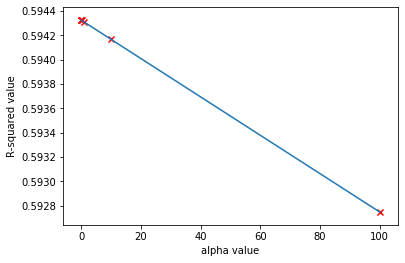

In [83]:
alpha = [0.001,0.01,0.1,1.0,10.0,100]
R_squared = [0.594323249486012,0.5943231076401835,0.5943216891454707,0.594307500607028,0.5941653057212362,0.5927474563336848]
plt.plot(alpha,R_squared)
plt.scatter(alpha,R_squared,marker="x",c="red")
plt.xlabel("alpha value")
plt.ylabel("R-squared value")